In [ ]:
import pandas as pd
import numpy as np

df_bh_housing = pd.read_csv("brightonhovehousing.csv")
df_bh_housing = df_bh_housing.iloc[17:].copy()
#df_bh_housing['Flat / Maisonette'] = df_bh_housing['Flat / Maisonette'].str.replace(',', '').astype(float)

df_man_housing = pd.read_csv('manhousing.csv')
df_man_housing = df_man_housing.iloc[17:].copy()
#df_man_housing['Flat / Maisonette'] = df_man_housing['Flat / Maisonette'].str.replace(',', '').astype(float)

df_man_housing

,Year,Total housing units,Bungalow,Flat / Maisonette,Terraced House,Semi-Detached House,Detached House,Unknown
17,2010,"217,870","2,690","77,790","78,550","53,010","5,440",300
18,2011,"218,270","2,710","78,420","78,180","53,090","5,480",290
19,2012,"219,280","2,760","78,940","78,390","53,280","5,530",280
20,2013,"221,340","2,770","80,210","78,650","53,590","5,640",350
21,2014,"221,850","2,780","80,300","78,740","53,850","5,730",330
22,2015,"222,730","2,830","80,600","78,930","54,100","5,820",320
23,2016,"224,570","2,830","81,500","79,340","54,540","5,910",320
24,2017,"226,310","2,840","82,470","79,640","54,880","5,990",340
25,2018,"228,300","2,840","83,760","79,860","55,150","6,080",460
26,2019,"230,900","2,840","85,420","80,050","55,630","6,180",650


In [ ]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
#x = df[['Year']].copy()##.to_numpy()
#y = df['Bungalow'].copy()##.to_numpy()


# Step 3: Create a model and train it
#model = LogisticRegression(solver='liblinear', C=10.0, random_state=0)
#model.fit(x, y)

# Step 4: Evaluate the model
#p_pred = model.predict_proba(x)
#y_pred = model.predict(x)
#score_ = model.score(x, y)
#conf_m = confusion_matrix(y, y_pred)
#report = classification_report(y, y_pred)

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
def houseNumReg(df, year):
  data = {'Year': [2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021]}
  X_train = pd.DataFrame(data)

  Y_bung = df['Bungalow'].str.replace(',', '').astype(float)
  modelbung = LinearRegression(fit_intercept=True) ## Create a model
  modelbung.fit(X_train, Y_bung) ## Fit the model to the data
  bunga = modelbung.predict([[year]])[0]

  Y_flat = df['Flat / Maisonette'].str.replace(',', '').astype(float)
  modelflat = LinearRegression(fit_intercept=True) ## Create a model
  modelflat.fit(X_train, Y_flat) ## Fit the model to the data
  flata = modelflat.predict([[year]])[0]

  Y_terr = df['Terraced House'].str.replace(',', '').astype(float)
  modelterr = LinearRegression(fit_intercept=True) ## Create a model
  modelterr.fit(X_train, Y_terr) ## Fit the model to the data
  terra = modelterr.predict([[year]])[0]

  Y_semi = df['Semi-Detached House'].str.replace(',', '').astype(float)
  modelsemi = LinearRegression(fit_intercept=True) ## Create a model
  modelsemi.fit(X_train, Y_semi) ## Fit the model to the data
  semia = modelsemi.predict([[year]])[0]

  Y_detach = df['Detached House'].str.replace(',', '').astype(float)
  modeldetach = LinearRegression(fit_intercept=True) ## Create a model
  modeldetach.fit(X_train, Y_detach) ## Fit the model to the data
  detacha = modeldetach.predict([[year]])[0]

  Y_unkown = df['Unknown'].str.replace(',', '').astype(float)
  modelunkown = LinearRegression(fit_intercept=True) ## Create a model
  modelunkown.fit(X_train, Y_unkown) ## Fit the model to the data
  unkowna = modelunkown.predict([[year]])[0]

  return(bunga + flata + terra + semia + detacha + unkowna)

In [ ]:
print(houseNumReg(df_bh_housing, 2034))
print(houseNumReg(df_bh_housing, 2044))
print(houseNumReg(df_bh_housing, 2074))

print(houseNumReg(df_man_housing, 2034))
print(houseNumReg(df_man_housing, 2044))
print(houseNumReg(df_man_housing, 2074))

138773.84615384619
144585.38461538457
162019.99999999997
257875.79254079278
275511.8065268066
328419.84848484874


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature n

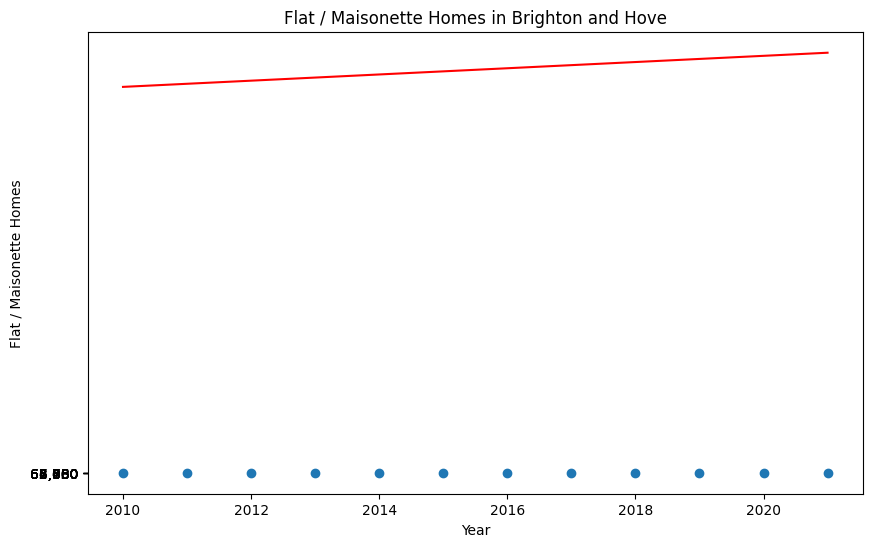

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df is your DataFrame
# Assuming m and b are the slope and intercept for the regression line

# Plot scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df_bh_housing['Year'], df_bh_housing['Flat / Maisonette'], label='Data')

# Plot regression line
plt.plot(df_bh_housing['Year'], 503.74 * df_bh_housing['Year'] - 949936, color='red', label='Regression Line')

# Add labels and title
plt.xlabel('Year')
plt.ylabel('Flat / Maisonette Homes')
plt.title('Flat / Maisonette Homes in Brighton and Hove')

# Show plot
plt.show()


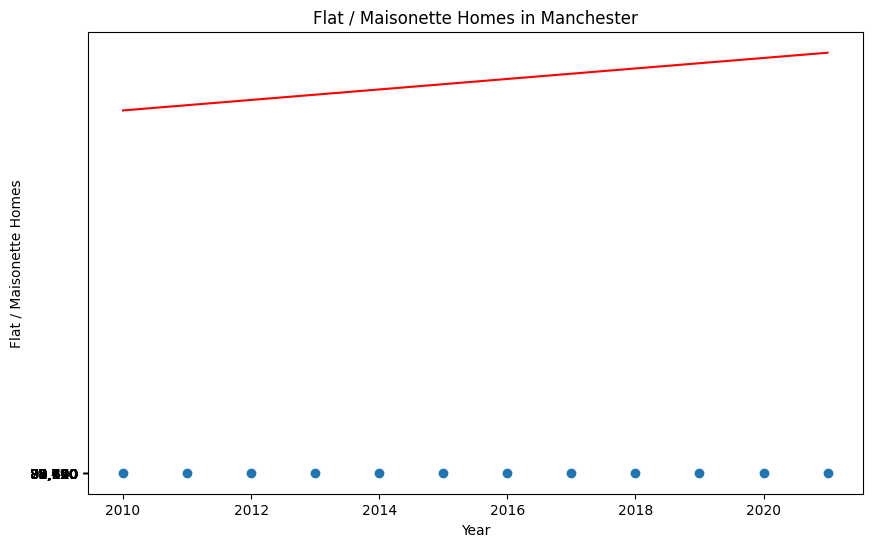

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df is your DataFrame
# Assuming m and b are the slope and intercept for the regression line

# Plot scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df_man_housing['Year'], df_man_housing['Flat / Maisonette'], label='Data')

# Plot regression line
plt.plot(df_man_housing['Year'], 1104.1 * df_man_housing['Year'] - 2143000, color='red', label='Regression Line')

# Add labels and title
plt.xlabel('Year')
plt.ylabel('Flat / Maisonette Homes')
plt.title('Flat / Maisonette Homes in Manchester')

# Show plot
plt.show()

In [ ]:
df_income = pd.read_csv('Average_Salary.csv')

df_income['Salary'] = df_income['Salary'].str.replace(',', '').str.replace('£', '').astype(float)
df_income.sort_values(by='Salary', inplace=True)

#df_income = df_income.iloc[:199]
df_income = df_income[ df_income['Salary'] <= 60000 ]

# Calculate the first quartile (Q1) and third quartile (Q3)
Q1 = df_income['Salary'].quantile(0.25)
Q3 = df_income['Salary'].quantile(0.75)

# Calculate the interquartile range (IQR)
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers
#df_income = df_income[(df_income['Salary'] >= lower_bound) & (df_income['Salary'] <= upper_bound)]

df_income

,Unnamed: 0,Job_Sector,Job_Title,Salary
375,375,Tourism & Hospitality,Cabin Crew,16200.0
376,376,Tourism & Hospitality,Flight Attendant,16200.0
293,293,Restaurants,Kitchen Assistant,16200.0
283,283,Pharmaceutical,Pharmacy Dispenser,17000.0
298,298,Restaurants,Waiter,17100.0
...,...,...,...,...
226,226,Legal,Family Lawyer,56700.0
26,26,Administration,Lead Business Analyst,56800.0
34,34,Administration,Project Manager,57500.0
250,250,Marketing,Digital Creative Director,58200.0


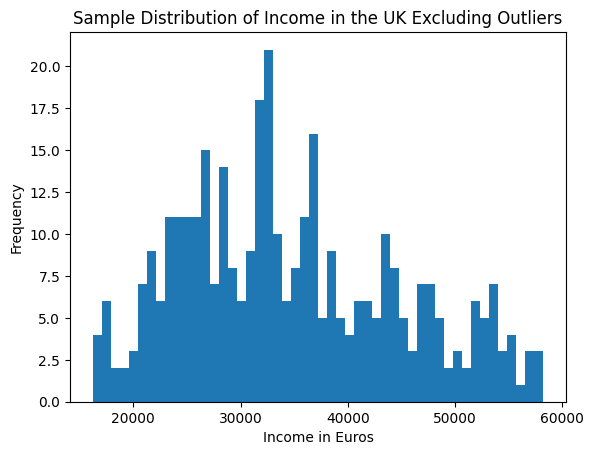

In [ ]:
import matplotlib.pyplot as plt

# Assuming df_income is your DataFrame
value_hist = df_income["Salary"].hist(bins=50)  # Adjust the number of bins as needed
plt.title("Sample Distribution of Income in the UK Excluding Outliers")
plt.xlabel("Income in Euros")
plt.ylabel("Frequency")
plt.grid(False)
plt.show()

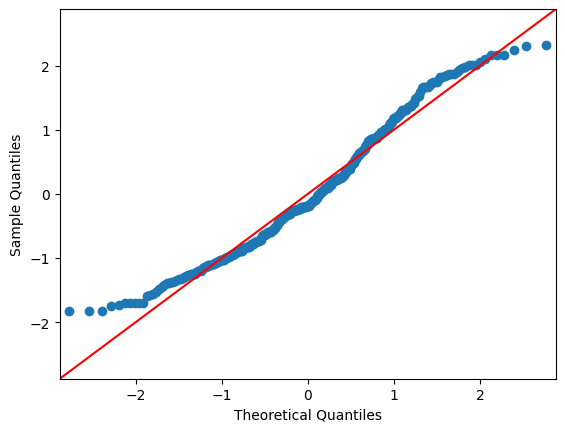

In [ ]:
import statsmodels.api as sm
import pylab as py
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_income['Normalized_Salary'] = scaler.fit_transform(df_income[['Salary']])

sm.qqplot(df_income['Normalized_Salary'].to_numpy(), line ='45')
py.show()

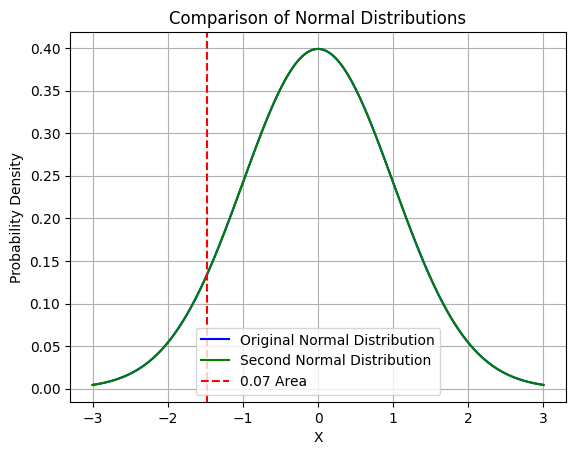

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Generate data for the original normal distribution
mu = 0  # Mean
sigma = 1  # Standard deviation
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 1000)  # Range of x values
y = norm.pdf(x, mu, sigma)  # Probability density function of normal distribution

# Calculate x-value corresponding to 0.07 area from the left
x_value_at_007_area = norm.ppf(0.07, mu, sigma)

# Plot the original normal distribution
plt.plot(x, y, color='blue', label='Original Normal Distribution')

# Generate data for the second normal distribution
# Generate data for the original normal distribution
mu2 = -2.2  # Mean
sigma2 = 0.2  # Standard deviation
x2 = np.linspace(mu - 3*sigma, mu + 3*sigma, 1000)  # Range of x values
y2 = norm.pdf(x, mu, sigma)  # Probability density function of normal distribution

# Plot the second normal distribution
plt.plot(x2, y2, color='green', label='Second Normal Distribution')

# Add a vertical line at x_value_at_007_area
plt.axvline(x=x_value_at_007_area, color='red', linestyle='--', label='0.07 Area')
plt.legend()

plt.title('Comparison of Normal Distributions')
plt.xlabel('X')
plt.ylabel('Probability Density')
plt.grid(True)
plt.show()


In [ ]:
data = {
    "population": [550630],
    "homeless": [2796],
    "percent homeless": [2796/550630],
    "houses": [238800],
    "house price": [220625],
    "income": [27500]
}


df_sim = pd.DataFrame(data)

df_sim

,population,homeless,percent homeless,houses,house price,income
0,550630,2796,0.005078,238800,220625,27500


In [ ]:
df_inflation = pd.read_csv('inflation_data.csv')

df_inflation.loc[0]['amount']

1.0

In [ ]:
from scipy.stats import norm

def prop_homeless(x, p, year):
  if year < 2024:
    return(norm.cdf((0.03830304155 - x/p)/(( 8203.128984* df_inflation.loc[2024 - 2024]['amount'] )/p)))
  return(norm.cdf((0.03830304155 - x/p)/(( 8203.128984* df_inflation.loc[year - 2024]['amount'] )/p)))

In [ ]:
import warnings
warnings.filterwarnings('ignore')

df_monte1 = pd.DataFrame({'percent homeless': [1], 'houses': [1]})
df_monte2 = pd.DataFrame({'percent homeless': [1], 'houses': [1]})
df_monte3 = pd.DataFrame({'percent homeless': [1], 'houses': [1]})

for j in range(2000):
  data = {
      "population": [550630],
      "homeless": [2796],
      "percent homeless": [2796/550630],
      "houses": [238800],
      "house price": [220625],
      "income": [27500]
  }


  df_sim1 = pd.DataFrame(data)

  thouses = 238800
  thomeless = 2796
  phomeless = 2796/238800
  tpop = 550630
  mincome = 27500
  mhomeprice = 220625

  houses_change = houseNumReg(df_man_housing, 2025) - houseNumReg(df_man_housing, 2024)
  homeless_change = -0.01
  pop_change = 5652.1
  income_change = 581.02
  homeprice_change = 9216.1

  flooding_percent = 0.0333
  flooding_houses = 0.010477

  recession_percent = 0.07
  recession_money = 0.048449

  migration_percent = 0.01 #random
  migration_pop = 0.00313067749

  for i in range(50):
    thouses += houses_change
    mhomeprice += homeprice_change
    mincome += income_change
    prevpop = tpop #for migration
    tpop += pop_change

    if (np.random.random() <= flooding_percent):
      #print('flooded')
      thouses -= houses_change

      prev_houses = thouses
      thouses = thouses * (1 - flooding_houses)

      house_total_money = prev_houses * mhomeprice
      mhomeprice = house_total_money / thouses

    if (np.random.random() <= recession_percent):
      #print('recession')
      mincome -= income_change
      mhomeprice -= homeprice_change
      mhomeprice = mhomeprice*(1 - recession_money)
      mincome = mincome*(1 - recession_money)

    if (np.random.random() <= migration_percent):
      #print('migration')
      tpop = tpop * (1 + migration_pop)
      mhomeprice = (tpop/prevpop) * mhomeprice

    phomeless = prop_homeless(mincome, mhomeprice, i + 2021)
    thomeless = tpop*phomeless
    df_sim1 = df_sim1.append({'population': tpop, 'homeless': thomeless, 'percent homeless': phomeless, 'houses': thouses, 'house price': mhomeprice, 'income': mincome}, ignore_index=True)

  df_monte1 = df_monte1.append({'percent homeless': df_sim1.loc[10]['percent homeless'], 'houses': df_sim1.loc[10]['houses']}, ignore_index=True)
  df_monte2 = df_monte2.append({'percent homeless': df_sim1.loc[25]['percent homeless'], 'houses': df_sim1.loc[25]['houses']}, ignore_index=True)
  df_monte3 = df_monte3.append({'percent homeless': df_sim1.loc[50]['percent homeless'], 'houses': df_sim1.loc[50]['houses']}, ignore_index=True)
  if (j%100 == 0):
    print(j)

print(df_monte1)
print(df_monte2)
print(df_monte3)

0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
      percent homeless         houses
0             1.000000       1.000000
1             0.010695  256436.013986
2             0.010695  256436.013986
3             0.010695  256436.013986
4             0.015417  256436.013986
...                ...            ...
1996          0.021016  256436.013986
1997          0.014745  256436.013986
1998          0.014879  256436.013986
1999          0.010695  256436.013986
2000          0.020330  256436.013986

[2001 rows x 2 columns]
      percent homeless         houses
0             1.000000       1.000000
1             0.052504  273723.339352
2             0.032477  282890.034965
3             0.033323  278310.412685
4             0.040453  282890.034965
...                ...            ...
1996          0.039950  282890.034965
1997          0.049949  278218.026426
1998          0.031913  282890.034965
1999          0.025796  282890.034965
2000         

In [ ]:
print(df_monte1['percent homeless'].mean())
print(df_monte1['houses'].mean())

df_monte1

0.014034350691466422
255131.47587144023


,percent homeless,houses
1,0.010695,256436.013986
2,0.010695,256436.013986
3,0.010695,256436.013986
4,0.015417,256436.013986
5,0.015059,256436.013986
...,...,...
1996,0.021016,256436.013986
1997,0.014745,256436.013986
1998,0.014879,256436.013986
1999,0.010695,256436.013986


In [ ]:
print(df_monte2['percent homeless'].mean())
print(df_monte2['houses'].mean())

df_monte2

0.03988058087387883
279386.0647289085


,percent homeless,houses
1,0.052504,273723.339352
2,0.032477,282890.034965
3,0.033323,278310.412685
4,0.040453,282890.034965
5,0.054298,264980.814700
...,...,...
1996,0.039950,282890.034965
1997,0.049949,278218.026426
1998,0.031913,282890.034965
1999,0.025796,282890.034965


In [ ]:
print(df_monte3['percent homeless'].mean())
print(df_monte3['houses'].mean())

df_monte3

0.11779494218384726
319310.35964629357


,percent homeless,houses
1,0.136816,312775.473951
2,0.085731,326980.069930
3,0.114007,317351.443021
4,0.135581,322123.288872
5,0.112702,304106.067478
...,...,...
1996,0.108471,321956.993605
1997,0.131377,322308.061391
1998,0.086807,321920.039102
1999,0.102672,326980.069930
